In [1]:
from pyspark.sql import SparkSession
from datetime import datetime


In [2]:
warehouse_location = '/user/final_project'
catalog_location = "/user/final_project_db2"

In [3]:
# Aqui se obtienen los datos de la DB de emergencias medicas, almacenados en un bucket de Google
# Solo es necesario correrlo una vez para poder tener el archivo en nuestra instancia


# !hdfs dfs -ls /user
# !hdfs dfs -mkdir /user/final_project
# !wget https://storage.googleapis.com/medical-urgencies-rfp-aav/urgenciascomplete.csv
# !hdfs dfs -moveFromLocal urgenciascomplete.csv /user/final_project/

In [4]:
# Aqui se obtienen los datos de la DB de reporte de covid, almacenados en el mismo bucket de Google


# !hdfs dfs -ls /user
# !hdfs dfs -mkdir /user/final_project_db2
# !wget https://storage.googleapis.com/medical-urgencies-rfp-aav/WHO-COVID-19-global-data.csv
# !hdfs dfs -moveFromLocal WHO-COVID-19-global-data.csv /user/final_project_db2/

In [5]:
#en hive, crear tabla como externa.
"""
hive> 
PRIMERA DB
CREATE EXTERNAL TABLE urgenciascomplete
(
  ID INT ,
  CLUES STRING,
  date_st DATE,
  HORASESTANCIA INT,
  age INT,
  SEXO INT,
  AFECPRIN STRING ,
  desc STRING ,
  toem_norm float,
  lat float
)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
STORED AS TEXTFILE
location '/user/final_project';

CREATE TABLE new_table AS
SELECT id, clues, date_st, age, sexo, desc
FROM urgenciascomplete;

DROP TABLE urgenciascomplete;

ALTER TABLE new_table RENAME TO urgenciascomplete;

////////////////////////////////////////////////////////////////////////////////////

SEGUNDA DB
CREATE EXTERNAL TABLE covidcatalog
(
  Date_reported DATE ,
  Country_code STRING,
  Country STRING,
  WHO_region STRING,
  New_cases INT,
  Cumulative_cases INT,
  New_deaths INT ,
  Cumulative_deaths INT
)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
STORED AS TEXTFILE
location '/user/final_project_db2';
"""

"\nhive> \nPRIMERA DB\nCREATE EXTERNAL TABLE urgenciascomplete\n(\n  ID INT ,\n  CLUES STRING,\n  date_st DATE,\n  HORASESTANCIA INT,\n  age INT,\n  SEXO INT,\n  AFECPRIN STRING ,\n  desc STRING ,\n  toem_norm float,\n  lat float\n)\nROW FORMAT DELIMITED\nFIELDS TERMINATED BY ','\nLINES TERMINATED BY '\n'\nSTORED AS TEXTFILE\nlocation '/user/final_project';\n\nCREATE TABLE new_table AS\nSELECT id, clues, date_st, age, sexo, desc\nFROM urgenciascomplete;\n\nDROP TABLE urgenciascomplete;\n\nALTER TABLE new_table RENAME TO urgenciascomplete;\n\n////////////////////////////////////////////////////////////////////////////////////\n\nSEGUNDA DB\nCREATE EXTERNAL TABLE covidcatalog\n(\n  Date_reported DATE ,\n  Country_code STRING,\n  Country STRING,\n  WHO_region STRING,\n  New_cases INT,\n  Cumulative_cases INT,\n  New_deaths INT ,\n  Cumulative_deaths INT\n)\nROW FORMAT DELIMITED\nFIELDS TERMINATED BY ','\nLINES TERMINATED BY '\n'\nSTORED AS TEXTFILE\nlocation '/user/final_project_db2';\n"

In [6]:
spark = SparkSession \
    .builder \
    .appName("Mi primer app de Spark") \
    .config("spark.sql.warehouse.dir", warehouse_location) \
    .enableHiveSupport() \
    .getOrCreate()

In [7]:
spark.sql("SELECT * FROM urgenciascomplete WHERE date_st > '2020-01-03' limit 5").show()

ivysettings.xml file not found in HIVE_HOME or HIVE_CONF_DIR,/etc/hive/conf.dist/ivysettings.xml will be used


+------+-----------+----------+---+----+--------------------+
|    id|      clues|   date_st|age|sexo|                desc|
+------+-----------+----------+---+----+--------------------+
|268046|JCSSA002195|2020-12-05| 26|   2|dolor abdominal l...|
|268048|JCSSA002195|2020-12-01|  2|   2|             "fiebre|
|268054|JCSSA002195|2020-12-29| 17|   2|         dolor agudo|
|268058|JCSSA002195|2020-12-29| 60|   2|         dolor agudo|
|268056|JCSSA002195|2020-12-30|  3|   2|consulta para ate...|
+------+-----------+----------+---+----+--------------------+



In [8]:
# Un problema con el que nos encontramos fue que nuestra DB era demasiado grande como para almacenarla
# en un solo DataFrame, asi que primero optamos en guardar por tres etapas: Antes, durante y despues de COVID.
# Al tratar esa solucion, de igual manera seguian siendo demasiado grandes las colecciones de datos, asi que nuestra
# solucion fue almancenar por mes, sin importar el año, las colecciones en 12 DataFrames distintos

In [9]:
# emergencies = spark.sql("SELECT * FROM urgenciascomplete where sexo > 0")

In [10]:
# pandas_emergencies = emergencies.toPandas()

In [11]:
emergencies_01 = spark.sql("SELECT clues, date_st, age, sexo, desc FROM urgenciascomplete WHERE sexo > 0 AND MONTH(date_st) = 1")
emergencies_02 = spark.sql("SELECT clues, date_st, age, sexo, desc FROM urgenciascomplete WHERE sexo > 0 AND MONTH(date_st) = 2")
emergencies_03 = spark.sql("SELECT clues, date_st, age, sexo, desc FROM urgenciascomplete WHERE sexo > 0 AND MONTH(date_st) = 3")
emergencies_04 = spark.sql("SELECT clues, date_st, age, sexo, desc FROM urgenciascomplete WHERE sexo > 0 AND MONTH(date_st) = 4")
emergencies_05 = spark.sql("SELECT clues, date_st, age, sexo, desc FROM urgenciascomplete WHERE sexo > 0 AND MONTH(date_st) = 5")
emergencies_06 = spark.sql("SELECT clues, date_st, age, sexo, desc FROM urgenciascomplete WHERE sexo > 0 AND MONTH(date_st) = 6")
emergencies_07 = spark.sql("SELECT clues, date_st, age, sexo, desc FROM urgenciascomplete WHERE sexo > 0 AND MONTH(date_st) = 7")
emergencies_08 = spark.sql("SELECT clues, date_st, age, sexo, desc FROM urgenciascomplete WHERE sexo > 0 AND MONTH(date_st) = 8")
emergencies_09 = spark.sql("SELECT clues, date_st, age, sexo, desc FROM urgenciascomplete WHERE sexo > 0 AND MONTH(date_st) = 9")
emergencies_10 = spark.sql("SELECT clues, date_st, age, sexo, desc FROM urgenciascomplete WHERE sexo > 0 AND MONTH(date_st) = 10")
emergencies_11 = spark.sql("SELECT clues, date_st, age, sexo, desc FROM urgenciascomplete WHERE sexo > 0 AND MONTH(date_st) = 11")
emergencies_12 = spark.sql("SELECT clues, date_st, age, sexo, desc FROM urgenciascomplete WHERE sexo > 0 AND MONTH(date_st) = 12")


In [12]:
# ubicaciones2 = spark.sql("SELECT * FROM urgenciascomplete")

In [13]:
print("Datos de contiene un solo dataframe")
print(emergencies_01)
emergencies_01.show()

Datos de contiene un solo dataframe
DataFrame[clues: string, date_st: date, age: int, sexo: int, desc: string]
+-----------+----------+---+----+--------------------+
|      clues|   date_st|age|sexo|                desc|
+-----------+----------+---+----+--------------------+
|PLSSA000834|2018-01-30| 47|   2|trastornos inflam...|
|PLSSA000834|2018-01-31| 15|   1|rinofaringitis ag...|
|PLSSA000834|2018-01-01| 61|   2|fractura de otras...|
|PLSSA000834|2018-01-02| 50|   1|efecto tóxico del...|
|PLSSA000834|2018-01-03| 58|   1|"neuralgia y neur...|
|PLSSA000834|2018-01-06| 77|   2|   "faringitis aguda|
|PLSSA000834|2018-01-07| 51|   1|   "faringitis aguda|
|PLSSA000834|2018-01-08| 41|   2|otras infecciones...|
|PLSSA000834|2018-01-09| 31|   2|otros dolores abd...|
|PLSSA000834|2018-01-10| 18|   2|gastroenteritis y...|
|PLSSA000834|2018-01-13| 23|   2|   "faringitis aguda|
|PLSSA000834|2018-01-14|  6|   2|          "gastritis|
|PLSSA000834|2018-01-15| 75|   2|herida del labio ...|
|PLSSA000

In [14]:
pandas_01 = emergencies_01.toPandas()

In [15]:
pandas_01.shape

(2795157, 5)

In [16]:
pandas_02 = emergencies_02.toPandas()

23/06/12 17:46:17 WARN org.apache.hadoop.util.concurrent.ExecutorHelper: Thread (Thread[GetFileInfo #1,5,main]) interrupted: 
java.lang.InterruptedException
	at com.google.common.util.concurrent.AbstractFuture.get(AbstractFuture.java:510)
	at com.google.common.util.concurrent.FluentFuture$TrustedFuture.get(FluentFuture.java:88)
	at org.apache.hadoop.util.concurrent.ExecutorHelper.logThrowableFromAfterExecute(ExecutorHelper.java:48)
	at org.apache.hadoop.util.concurrent.HadoopThreadPoolExecutor.afterExecute(HadoopThreadPoolExecutor.java:90)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1157)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)


In [17]:
pandas_03 = emergencies_03.toPandas()

In [18]:
pandas_04 = emergencies_04.toPandas()

In [19]:
pandas_05 = emergencies_05.toPandas()

23/06/12 17:47:43 WARN org.apache.hadoop.util.concurrent.ExecutorHelper: Thread (Thread[GetFileInfo #1,5,main]) interrupted: 
java.lang.InterruptedException
	at com.google.common.util.concurrent.AbstractFuture.get(AbstractFuture.java:510)
	at com.google.common.util.concurrent.FluentFuture$TrustedFuture.get(FluentFuture.java:88)
	at org.apache.hadoop.util.concurrent.ExecutorHelper.logThrowableFromAfterExecute(ExecutorHelper.java:48)
	at org.apache.hadoop.util.concurrent.HadoopThreadPoolExecutor.afterExecute(HadoopThreadPoolExecutor.java:90)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1157)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)


In [20]:
pandas_06 = emergencies_06.toPandas()

In [21]:
# Se tomó la decision de solo capturar hasta junio porque al parecer por un tema con Pandas o nuestro cluster, no podemos convertir toda
# la informacion a DataFrames

In [22]:
# pandas_07 = emergencies_07.toPandas()

In [23]:
# pandas_08 = emergencies_08.toPandas()

In [24]:
# pandas_09 = emergencies_09.toPandas()

In [25]:
# pandas_10 = emergencies_10.toPandas()

In [26]:
# pandas_11 = emergencies_11.toPandas()

In [27]:
# pandas_12 = emergencies_12.toPandas()

In [28]:
print(pandas_01.shape)
print(pandas_02.shape)
print(pandas_03.shape)
print(pandas_04.shape)
print(pandas_05.shape)
print(pandas_06.shape)
# print(pandas_07.shape)
# print(pandas_08.shape)
# print(pandas_09.shape)
# print(pandas_10.shape)
# print(pandas_11.shape)
# print(pandas_12.shape)

(2795157, 5)
(2594323, 5)
(2907035, 5)
(2621860, 5)
(2684385, 5)
(2602875, 5)


In [29]:
# Manipulacion del catalogo de COVID

In [30]:
spark = SparkSession \
    .builder \
    .appName("Mi primer app de Spark") \
    .config("spark.sql.warehouse.dir", catalog_location) \
    .enableHiveSupport() \
    .getOrCreate()

In [31]:
spark.sql("SELECT * FROM covidcatalog where country_code = 'MX' limit 10").show()

+-------------+------------+-------+----------+---------+----------------+----------+-----------------+
|date_reported|country_code|country|who_region|new_cases|cumulative_cases|new_deaths|cumulative_deaths|
+-------------+------------+-------+----------+---------+----------------+----------+-----------------+
|   2020-01-03|          MX| Mexico|      AMRO|        0|               0|         0|                0|
|   2020-01-04|          MX| Mexico|      AMRO|        0|               0|         0|                0|
|   2020-01-05|          MX| Mexico|      AMRO|        0|               0|         0|                0|
|   2020-01-06|          MX| Mexico|      AMRO|        0|               0|         0|                0|
|   2020-01-07|          MX| Mexico|      AMRO|        0|               0|         0|                0|
|   2020-01-08|          MX| Mexico|      AMRO|        0|               0|         0|                0|
|   2020-01-09|          MX| Mexico|      AMRO|        0|       

In [32]:
covid_daily_report = spark.sql("SELECT date_reported, country_code, new_cases, cumulative_cases, new_deaths, cumulative_deaths FROM covidcatalog where country_code = 'MX'")

In [33]:
print("Datos de contiene el dataframe de los reportes diarios de la WHO")
print(covid_daily_report)
covid_daily_report.show()

Datos de contiene el dataframe de los reportes diarios de la WHO
DataFrame[date_reported: date, country_code: string, new_cases: int, cumulative_cases: int, new_deaths: int, cumulative_deaths: int]
+-------------+------------+---------+----------------+----------+-----------------+
|date_reported|country_code|new_cases|cumulative_cases|new_deaths|cumulative_deaths|
+-------------+------------+---------+----------------+----------+-----------------+
|   2020-01-03|          MX|        0|               0|         0|                0|
|   2020-01-04|          MX|        0|               0|         0|                0|
|   2020-01-05|          MX|        0|               0|         0|                0|
|   2020-01-06|          MX|        0|               0|         0|                0|
|   2020-01-07|          MX|        0|               0|         0|                0|
|   2020-01-08|          MX|        0|               0|         0|                0|
|   2020-01-09|          MX|        0

In [34]:
pandas_daily_report = covid_daily_report.toPandas()

In [35]:
pandas_daily_report.shape

(1252, 6)

In [36]:
pandas_daily_report.tail(5)

,date_reported,country_code,new_cases,cumulative_cases,new_deaths,cumulative_deaths
1247,2023-06-03,MX,0,7619402,0,334157
1248,2023-06-04,MX,1660,7621062,10,334167
1249,2023-06-05,MX,0,7621062,0,334167
1250,2023-06-06,MX,0,7621062,0,334167
1251,2023-06-07,MX,0,7621062,0,334167


In [37]:
import folium as fl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Analisis y limpieza de los datos

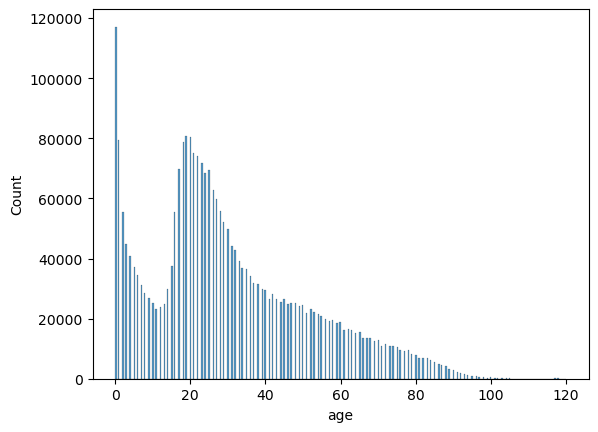

In [39]:
sns.histplot(x='age', data=pandas_01)
plt.show()

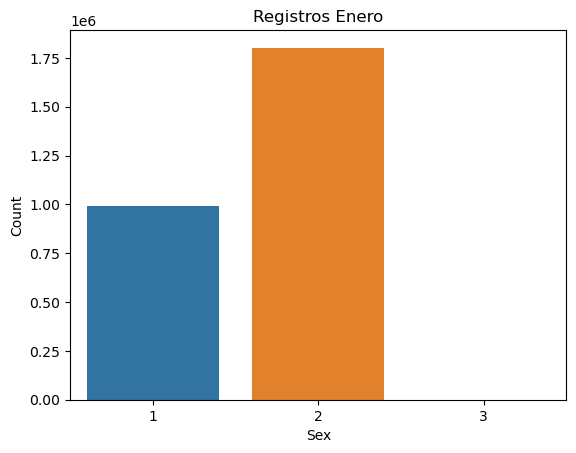

In [56]:
sns.countplot(x='sexo', data=pandas_01)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Registros Enero')

plt.show()

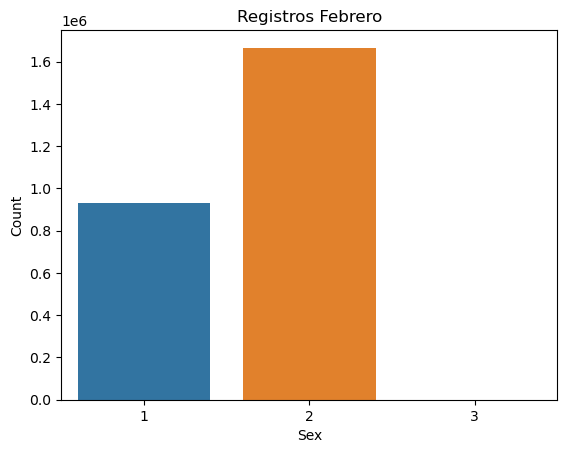

In [57]:
sns.countplot(x='sexo', data=pandas_02)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Registros Febrero')

plt.show()

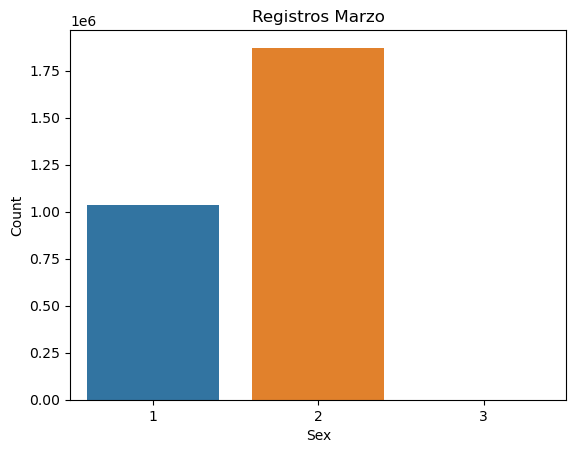

In [58]:
sns.countplot(x='sexo', data=pandas_03)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Registros Marzo')

plt.show()

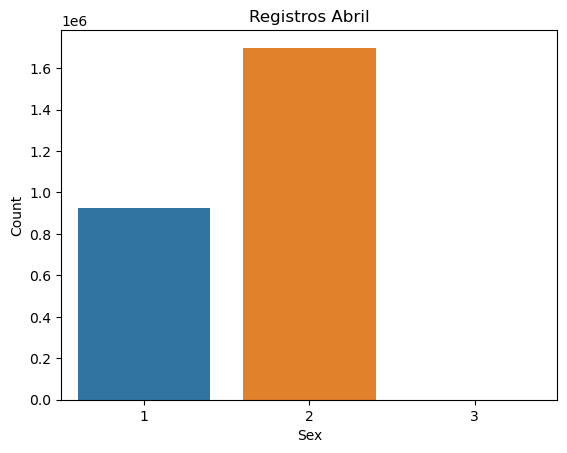

In [59]:
sns.countplot(x='sexo', data=pandas_04)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Registros Abril')

plt.show()

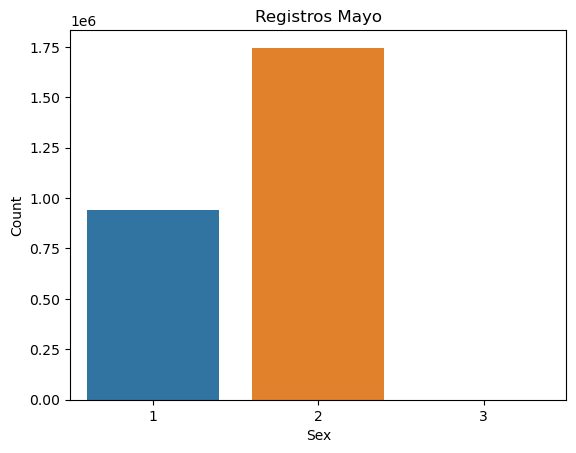

In [60]:
sns.countplot(x='sexo', data=pandas_05)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Registros Mayo')

plt.show()

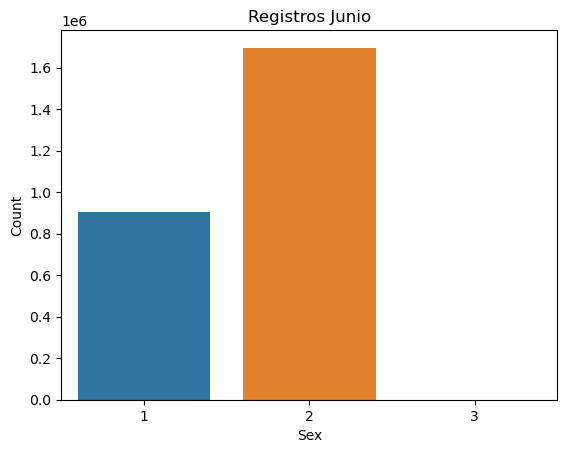

In [61]:
sns.countplot(x='sexo', data=pandas_06)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Registros Junio')

plt.show()

In [ ]:
sexo_01 = pd.unique(pandas_01['sexo'])
desc_01 = pd.unique(pandas_01['desc'])

In [ ]:
age_01

In [ ]:
sexo_01

In [ ]:
desc_01

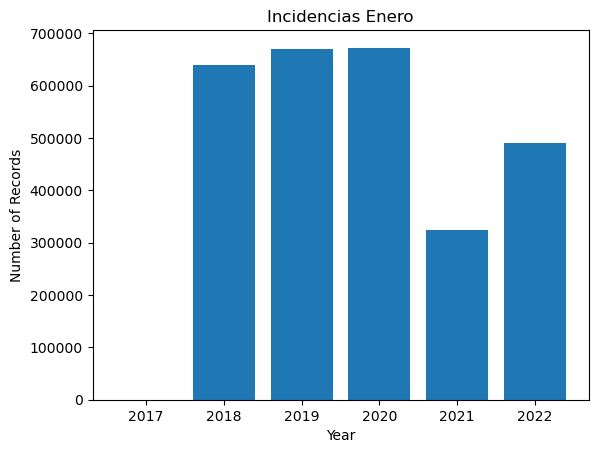

In [43]:
pandas_01['date_st'] = pd.to_datetime(pandas_01['date_st'])

pandas_01['year'] = pandas_01['date_st'].dt.year

record_counts = pandas_01['year'].value_counts().sort_index()

plt.bar(record_counts.index, record_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.title('Incidencias Enero')
plt.show()


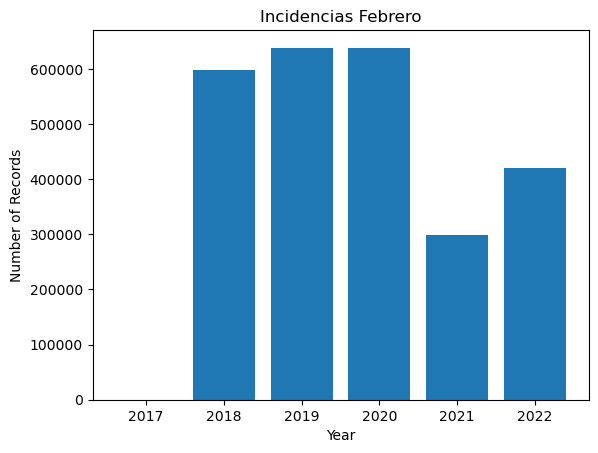

In [44]:
pandas_02['date_st'] = pd.to_datetime(pandas_02['date_st'])

pandas_02['year'] = pandas_02['date_st'].dt.year

record_counts = pandas_02['year'].value_counts().sort_index()

plt.bar(record_counts.index, record_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.title('Incidencias Febrero')
plt.show()

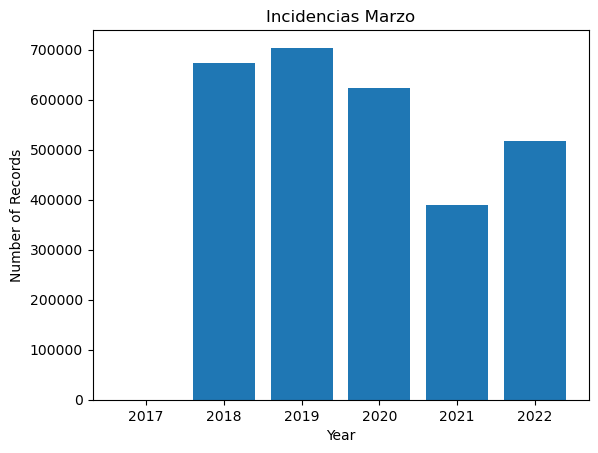

In [45]:
pandas_03['date_st'] = pd.to_datetime(pandas_03['date_st'])

pandas_03['year'] = pandas_03['date_st'].dt.year

record_counts = pandas_03['year'].value_counts().sort_index()

plt.bar(record_counts.index, record_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.title('Incidencias Marzo')
plt.show()

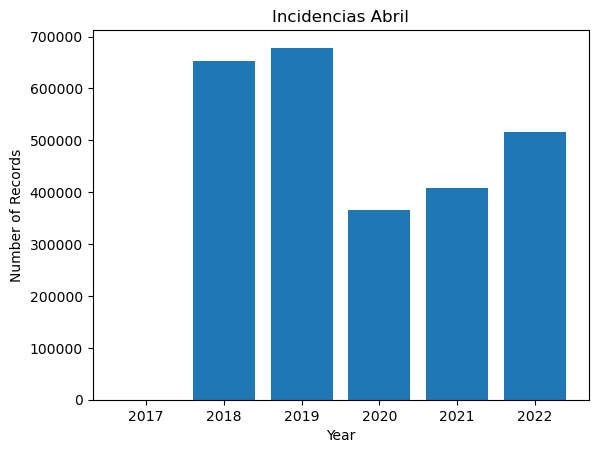

In [46]:
pandas_04['date_st'] = pd.to_datetime(pandas_04['date_st'])

pandas_04['year'] = pandas_04['date_st'].dt.year

record_counts = pandas_04['year'].value_counts().sort_index()

plt.bar(record_counts.index, record_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.title('Incidencias Abril')
plt.show()

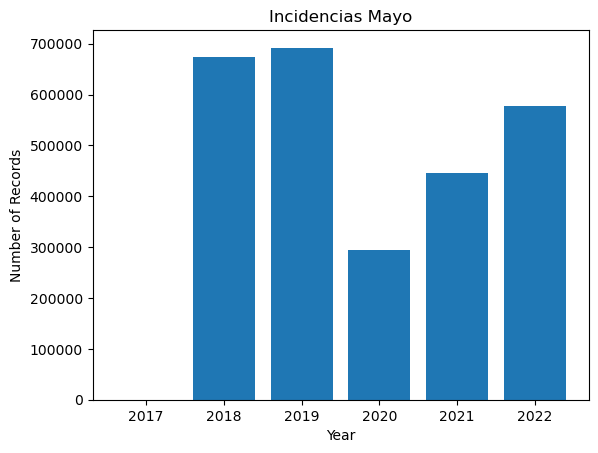

In [47]:
pandas_05['date_st'] = pd.to_datetime(pandas_05['date_st'])

pandas_05['year'] = pandas_05['date_st'].dt.year

record_counts = pandas_05['year'].value_counts().sort_index()

plt.bar(record_counts.index, record_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.title('Incidencias Mayo')
plt.show()

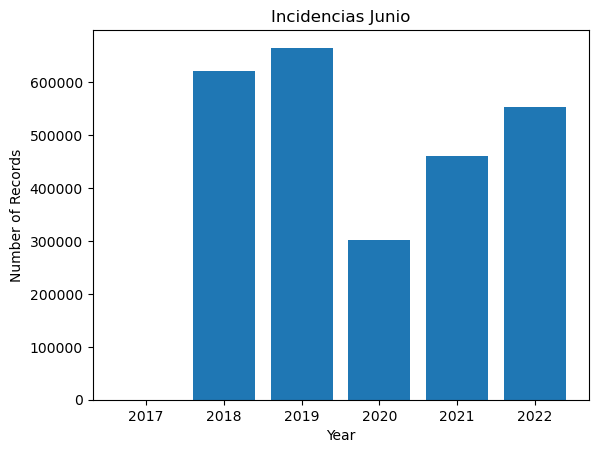

In [48]:
pandas_06['date_st'] = pd.to_datetime(pandas_06['date_st'])

pandas_06['year'] = pandas_06['date_st'].dt.year

record_counts = pandas_06['year'].value_counts().sort_index()

plt.bar(record_counts.index, record_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.title('Incidencias Junio')
plt.show()

In [ ]:
spark.stop()